<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


<ipython-input-2-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.dtypes


Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [7]:
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
indexes=['Count']
tab_df=pd.DataFrame(boston_df.count(), columns=indexes)
tab_df

,Count
CRIM,506
ZN,506
INDUS,506
CHAS,506
NOX,506
RM,506
AGE,506
DIS,506
RAD,506
TAX,506


In [9]:
table=[]
for column_name in boston_df.columns:
    column = boston_df[column_name]
    count1 = (column == 0).sum()
    count2 = (column == 'NaN').sum()
    table.append([column_name, count1, count2])

indexes=['Column Name', 'Count of zeros', 'Count of NaN']
tab_df=pd.DataFrame(table, columns=indexes)
tab_df.reset_index(drop=True, inplace=True)
df_reset=tab_df.set_index('Column Name')
df_reset

,Count of zeros,Count of NaN
Column Name,,
CRIM,0,0
ZN,372,0
INDUS,0,0
CHAS,471,0
NOX,0,0
RM,0,0
AGE,0,0
DIS,0,0
RAD,0,0


## Task 2
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

#### For the "Median value of owner-occupied homes" provide a boxplot


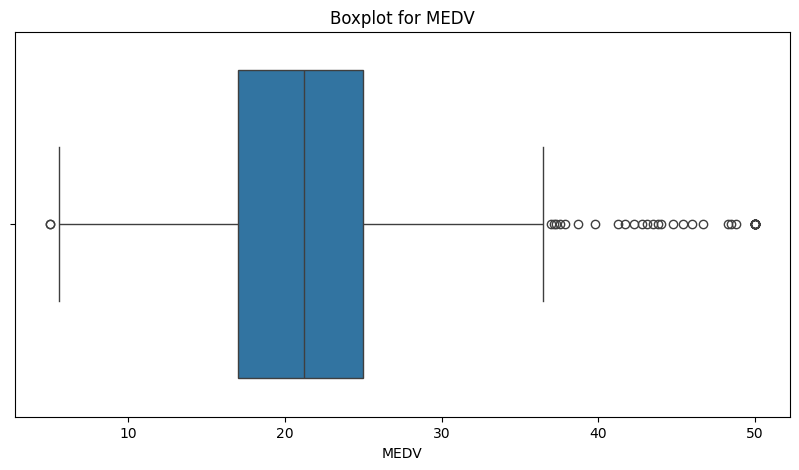

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

#### Provide a  bar plot for the Charles river variable



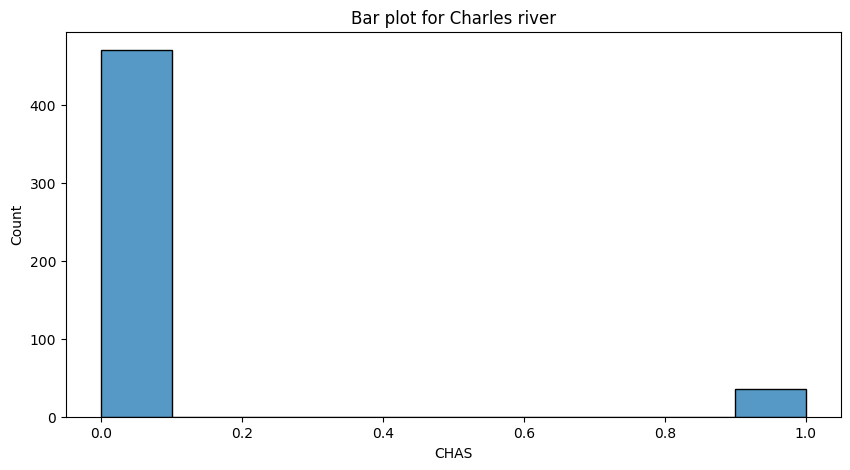

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data=boston_df,x="CHAS")
plt.title("Bar plot for Charles river")
plt.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = 0
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 1
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = 2

<ipython-input-13-cb1c67e093c9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['[0 , 35]', '[35 , 70]','[70 , max]'])


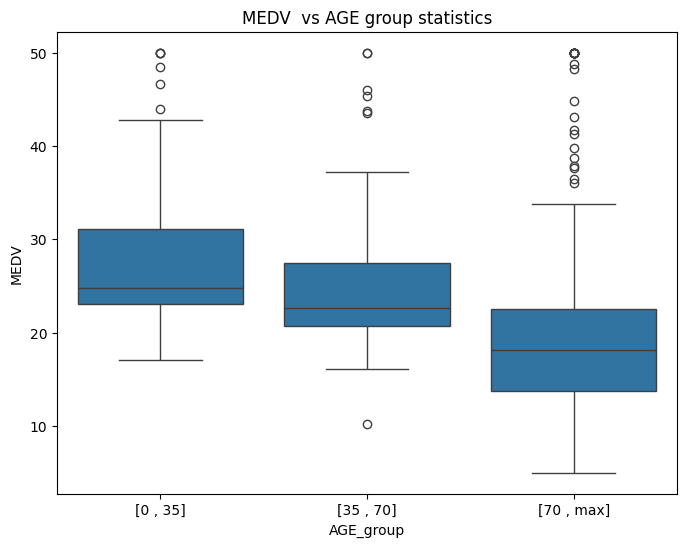

In [13]:
plt.figure(figsize = (8, 6))
plt.title('MEDV  vs AGE group statistics')
ax=sns.boxplot(x='AGE_group', y='MEDV', data=boston_df.sort_values('AGE_group'))
ax.set_xticklabels(['[0 , 35]', '[35 , 70]','[70 , max]'])
plt.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



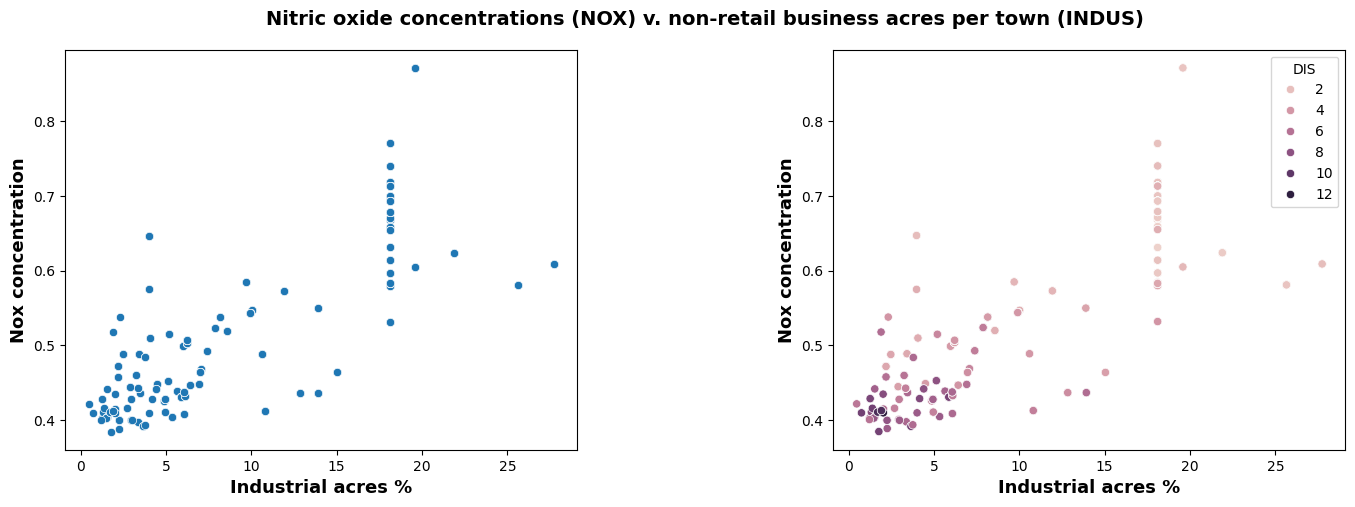

In [14]:
fig=plt.figure(figsize=(16,5))
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.4)
fig.suptitle('Nitric oxide concentrations (NOX) v. non-retail business acres per town (INDUS)',fontsize=14, fontweight='bold')
ax = fig.add_subplot(1, 2, 1)
#sns.set(style="whitegrid")
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_xlabel('Industrial acres %',fontsize=13, fontweight='bold')
ax.set_ylabel('Nox concentration', fontsize=13, fontweight='bold')
ax = fig.add_subplot(1, 2, 2)
ax = sns.scatterplot(x='INDUS', y='NOX', hue='DIS', data=boston_df)
ax.set_xlabel('Industrial acres %',fontsize=13, fontweight='bold')
ax.set_ylabel('Nox concentration', fontsize=13, fontweight='bold')
plt.show()

We can see a linear dependance NOX vs. INDUS. NOX pollution is linked to an increasing proportion of industrial zones in a given city area.

From the second graph, it looks like DIS has a more significant impact on NOX than variable INDUS.

#### Create a histogram for the pupil to teacher ratio variable



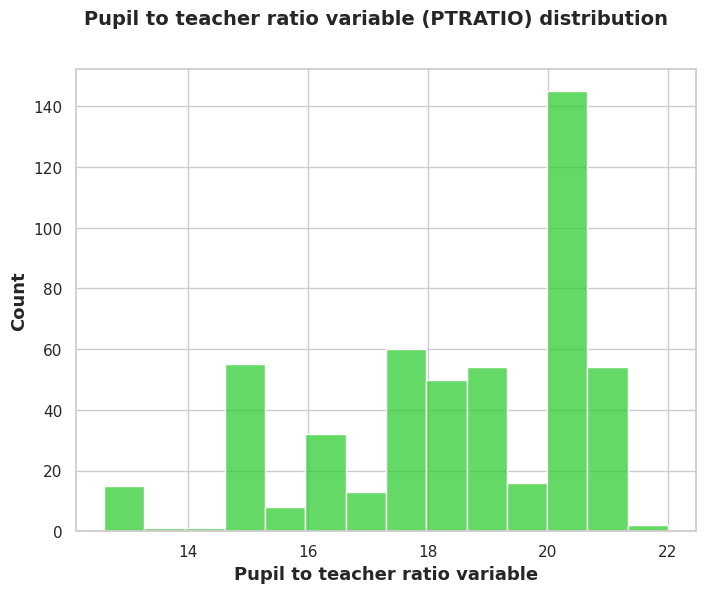

In [15]:
fig = plt.figure(figsize = (8, 6))
sns.set(style="whitegrid")

fig.suptitle('Pupil to teacher ratio variable (PTRATIO) distribution', fontsize=14, fontweight='bold')
ax = sns.histplot(data=boston_df,x='PTRATIO', color="limegreen")
ax.set_xlabel('Pupil to teacher ratio variable', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
plt.show()

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

 - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

 - State your hypothesis.

 - Use α = 0.05

 - Perform the test Statistics.

 - State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Null Hypothesis: Both average MEDV are the same

Alternative Hypothesis: Both average MEDV are NOT the same

In [16]:
boston_df["CHAS"].value_counts()
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]

scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)


TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [17]:
boston_df["AGE"].value_counts()
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2.0,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1.0,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,1.0,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1.0,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,1.0,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,2.0,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,2.0,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,2.0,70 years and older


Null Hypothesis: the three population means are equal

Alternative Hypothesis: At least one of the means differ

In [18]:
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

In [19]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))


F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


Null Hypothesis: NOX is not correlated with INDUS

Alternative Hypothesis: NOX is correlated with INDUS


In [20]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209192, P-value=7.913361061210442e-98


Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value



In [21]:
y = boston_df['MEDV']
x = boston_df['DIS']
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        23:03:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
import numpy as np
np.sqrt(0.062)  ##Pearson Coeffiecent value

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features